In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

import warnings
warnings.filterwarnings(action='ignore')

# TO USE XGBOOST YOU NEED TO RUN ' conda install -c anaconda py-xgboost ' IN TERMINAL THEN RESTART JUPYTER

In [4]:
# get data

train = pd.read_csv('df - train_set.csv')
test = pd.read_csv('df - test_set.csv')

train = train[(train['Commodities'] == 'APPLE GOLDEN DELICIOUS')]
del train['Commodities'] 

train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [5]:
del test['Commodities']
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 64.3+ KB


In [5]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [7]:
train['Province'].unique()

array(['CAPE', 'W.CAPE-BERGRIVER ETC', 'EASTERN CAPE', 'NATAL',
       'WEST COAST', 'TRANSVAAL', 'ORANGE FREE STATE'], dtype=object)

In [8]:
train['Container'].unique()

array(['M4183', 'JG110', 'JE090', 'IA400', 'EC120', 'AC030', 'M6125',
       'EF120', 'DT063', 'M9125', 'EG140'], dtype=object)

In [275]:
train['Size_Grade'].unique()

array(['1L', '2M', '2S', '1S', '1M', '1X', '2L', '2U', '2X', '1U'],
      dtype=object)

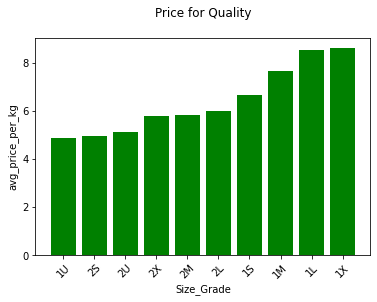

In [6]:
# DETERMINE ORDER OF SIZE_GRADE

size = train.groupby('Size_Grade').mean()
grades = size.avg_price_per_kg.sort_values().index #sort the indices 
price = size.avg_price_per_kg.sort_values()

plt.bar(grades, price, color= 'green')
plt.xticks(rotation=45)

plt.ylabel('avg_price_per_kg')
plt.xlabel('Size_Grade')


plt.title('Price for Quality\n')
plt.show()

In [6]:
# DUMMY

def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [7]:
# PREPROCESSING 
seed = 1
def preprocess_inputs(df, return_df=False):
    df = df.copy()
    
    # CLEAN PROVINCE COLUMN
    
    df['Province'] = df['Province'].str.replace(' ', '_')
    df['Province'] = df['Province'].str.replace('.', '_')
    df['Province'] = df['Province'].str.replace('-', '_')
    
    # DATE ENCODING
    # Split 'Date' column into year, month and day columns 

    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day

    df = df.drop(['Date'], axis = 1) 
    
    # BINARY ENCODING
    
    df['year'] = df['year'].replace({2020: 1, 2019: 0})
        
    # ONE-HOT ENCODING
    for column in ['Province', 'Container']:
        df = onehot_encode(df, column)
        
    # ORDINAL ENCODING
    df['Size_Grade'] = df['Size_Grade'].replace({'1X': 9,'1L': 8, '1M': 7, '1S': 6, '1U':0, '2X':3, '2L':5, '2M':4, '2S':1, '2U':2})
    
    
    # REMOVE REMORE HIGHLY CORRRELATED COLUMNS
    
    for column in ['Total_Kg_Sold', 'Sales_Total', 'Low_Price']:
        df = df.drop([column], axis = 1) 
   
        
    if return_df==True:
        return df
    
        ## for training dataset
        # REORDER COLUMNS SO THAT OUR DEPENDENT VARIABLE IS THE LAST COLUMN OF THE DATAFRAME
    elif 'avg_price_per_kg' in df.columns:
        column_titles = [col for col in df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
        df = df.reindex(columns = column_titles)
    
        # SPLIT DATA INTO PREDICTORS AND TARGET
    
        y = df['avg_price_per_kg']
        X = df.drop('avg_price_per_kg', axis=1)
        y = np.array(y)
        

        # SCALE
        x_scaler = StandardScaler()
        y_scaler = StandardScaler()

        X_scaled = x_scaler.fit_transform(X) 
        y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)) 
        
        # TRAIN TEST SPLIT
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False, random_state=seed)
        
        return X_train, X_test, y_train, y_test, x_scaler, y_scaler
    
        
    else:
        return df
    

In [306]:
X_train, X_test, y_train, y_test, x_scaler, y_scaler = preprocess_inputs(train)

In [311]:
# TRAIN A FEW MODELS

models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(n_estimators= 400, random_state= seed),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


In [312]:
#EVALUATE MODEL ON R SQUARED - HIGHER IS BETTER

for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))
    

                     Linear Regression R^2 Score: 0.58979
 Linear Regression (L2 Regularization) R^2 Score: 0.58983
 Linear Regression (L1 Regularization) R^2 Score: -0.00146
                   K-Nearest Neighbors R^2 Score: 0.61283
                        Neural Network R^2 Score: 0.81359
Support Vector Machine (Linear Kernel) R^2 Score: 0.58374
   Support Vector Machine (RBF Kernel) R^2 Score: 0.69046
                         Decision Tree R^2 Score: 0.84927
                         Random Forest R^2 Score: 0.90879
                     Gradient Boosting R^2 Score: 0.88083
                               XGBoost R^2 Score: 0.89711


In [313]:
#EVALUATE MODEL ON RMSE - LOWER IS BETTER

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + " RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(y_test ,y_pred))))
    
    errors = abs(y_pred - y_test)

    # Display the performance metrics
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

    mape = np.mean(100 * (errors / y_test))
    accuracy = 100 - mape

    print('Accuracy:', round(accuracy, 2), '%.')

                     Linear Regression RMSE: 0.65337
Mean Absolute Error: 0.49 degrees.
Accuracy: 119.88 %.
 Linear Regression (L2 Regularization) RMSE: 0.65334
Mean Absolute Error: 0.49 degrees.
Accuracy: 119.87 %.
 Linear Regression (L1 Regularization) RMSE: 1.02088
Mean Absolute Error: 0.79 degrees.
Accuracy: 110.42 %.
                   K-Nearest Neighbors RMSE: 0.63475
Mean Absolute Error: 0.44 degrees.
Accuracy: 88.94 %.
                        Neural Network RMSE: 0.44045
Mean Absolute Error: 1.06 degrees.
Accuracy: 114.65 %.
Support Vector Machine (Linear Kernel) RMSE: 0.65817
Mean Absolute Error: 1.01 degrees.
Accuracy: 119.88 %.
   Support Vector Machine (RBF Kernel) RMSE: 0.56757
Mean Absolute Error: 1.02 degrees.
Accuracy: 117.46 %.
                         Decision Tree RMSE: 0.39605
Mean Absolute Error: 1.13 degrees.
Accuracy: 111.08 %.
                         Random Forest RMSE: 0.30809
Mean Absolute Error: 1.09 degrees.
Accuracy: 112.22 %.
                     Gradient

In [320]:
# GENERATE CSV FOR SUBMISSION TO KAGGLE
# DON'T SUBMIT ALL, ONLY THOSE WHICH DID GOOD ON EVALUATION TO CONFIRM

df = preprocess_inputs(test)

Xs = list(df.columns)
Xs.remove('Index')

X_test = df[Xs]
X_scaled = x_scaler.fit_transform(X_test)

for name, model in models.items():
    y_pred = model.predict(X_scaled)
    y_rescaled = y_scaler.inverse_transform(y_pred) 
    d = pd.DataFrame(y_rescaled, columns =['avg_price_per_kg'])
    dff = pd.concat([df['Index'], d], axis=1)
    dff = dff.set_index('Index')
    
    match= re.findall('[A-Z]', name)    
    matchno = re.findall('[0-9]+', name)   
    file_name = ''.join(match) + ''.join(matchno)
    dff.to_csv(file_name + '.csv')

In [238]:
# FEAUTURE IMPORTANCES

df = train.drop('avg_price_per_kg', axis = 1)
features = preprocess_inputs(df)
feature_list = list(features.columns)


for name, model in models.items():
    if name == "                         Random Forest":
        # Get numerical feature importances
        importances = list(model.feature_importances_)

        # List of tuples with variable and importance
        feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

        # Sort the feature importances by most important first
        feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

        # Print out the feature and importances 
        [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



Variable: High_Price           Importance: 0.55
Variable: Weight_Kg            Importance: 0.15
Variable: Container_IA400      Importance: 0.1
Variable: Total_Qty_Sold       Importance: 0.07
Variable: Stock_On_Hand        Importance: 0.04
Variable: month                Importance: 0.02
Variable: day                  Importance: 0.02
Variable: Province_W_CAPE_BERGRIVER_ETC Importance: 0.01
Variable: Container_M4183      Importance: 0.01
Variable: year                 Importance: 0.0
Variable: Province_EASTERN_CAPE Importance: 0.0
Variable: Province_NATAL       Importance: 0.0
Variable: Province_ORANGE_FREE_STATE Importance: 0.0
Variable: Province_TRANSVAAL   Importance: 0.0
Variable: Province_WEST_COAST  Importance: 0.0
Variable: Container_DT063      Importance: 0.0
Variable: Container_EC120      Importance: 0.0
Variable: Container_EF120      Importance: 0.0
Variable: Container_EG140      Importance: 0.0
Variable: Container_JE090      Importance: 0.0
Variable: Container_JG110      Impor

In [239]:
#SELECTING IMPORTANT FEATURES

df = preprocess_inputs(train, return_df=True)


y = df['avg_price_per_kg']
X = df.drop('avg_price_per_kg', axis=1)

# GET IMPORTANT COLUMN NAMES

important = []
for i in ['Size_Grade', 'Container_IA400', 'Weight_Kg', 'Total_Qty_Sold', 'High_Price', 'month', 'day', 'Stock_On_Hand']:
    A = [col for col in df.columns if i in col]
    important.append(A)
    
important_list = [item for sublist in important for item in sublist]

# IMPORTANT DATAFRAME
X_imp = X[important_list]


In [244]:
# NEW MODEL WITH IMPORTANT FEATURES

X_imp_train, X_imp_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.30, shuffle=False, random_state=seed)

rf = RandomForestRegressor(n_estimators= 800, random_state=seed)

rf.fit(X_imp_train, y_train)

print("Random Forest trained.")

Random Forest trained.


In [245]:
# Make predictions and determine the error
pred = rf.predict(X_imp_test)

errors = abs(pred - y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')
print(" RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(y_test ,pred))))
    

Mean Absolute Error: 0.47 degrees.
Accuracy: 91.76 %.
 RMSE: 0.73139


In [249]:
# TRAIN MODELS WITH IMPORTANT FEATURES

models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(n_estimators= 800, random_state= seed),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_imp_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


In [247]:
#EVALUATE MODEL ON R SQUARED - HIGHER IS BETTER

for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_imp_test, y_test)))
 

                     Linear Regression R^2 Score: 0.50194
 Linear Regression (L2 Regularization) R^2 Score: 0.50446
 Linear Regression (L1 Regularization) R^2 Score: 0.25170
                   K-Nearest Neighbors R^2 Score: 0.69365
                        Neural Network R^2 Score: 0.41410
Support Vector Machine (Linear Kernel) R^2 Score: -7.74124
   Support Vector Machine (RBF Kernel) R^2 Score: 0.52682
                         Decision Tree R^2 Score: 0.79482
                         Random Forest R^2 Score: 0.89404
                     Gradient Boosting R^2 Score: 0.87775
                               XGBoost R^2 Score: 0.88432


In [250]:
#EVALUATE MODEL ON RMSE - LOWER IS BETTER

for name, model in models.items():
    y_pred = model.predict(X_imp_test)
    print(name + " RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(y_test ,y_pred))))
    
    errors = abs(y_pred - y_test)

    # Display the performance metrics
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

    mape = np.mean(100 * (errors / y_test))
    accuracy = 100 - mape

    print('Accuracy:', round(accuracy, 2), '%.')

                     Linear Regression RMSE: 1.61855
Mean Absolute Error: 1.17 degrees.
Accuracy: 74.23 %.
 Linear Regression (L2 Regularization) RMSE: 1.61445
Mean Absolute Error: 1.17 degrees.
Accuracy: 73.98 %.
 Linear Regression (L1 Regularization) RMSE: 1.98392
Mean Absolute Error: 1.51 degrees.
Accuracy: 66.67 %.
                   K-Nearest Neighbors RMSE: 1.26938
Mean Absolute Error: 0.9 degrees.
Accuracy: 83.27 %.
                        Neural Network RMSE: 2.01549
Mean Absolute Error: 1.39 degrees.
Accuracy: 74.18 %.
Support Vector Machine (Linear Kernel) RMSE: 4.05927
Mean Absolute Error: 2.83 degrees.
Accuracy: 16.71 %.
   Support Vector Machine (RBF Kernel) RMSE: 1.57761
Mean Absolute Error: 1.13 degrees.
Accuracy: 70.6 %.
                         Decision Tree RMSE: 1.01814
Mean Absolute Error: 0.58 degrees.
Accuracy: 90.78 %.
                         Random Forest RMSE: 0.73139
Mean Absolute Error: 0.47 degrees.
Accuracy: 91.76 %.
                     Gradient Boosting 

In [316]:
X_train, X_test, y_train, y_test, x_scaler, y_scaler = preprocess_inputs(train)
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [319]:
# ANOTHER CELL FOR GETTING CSV FOR SPECEFIC MODEL

df= preprocess_inputs(test)

Xs = list(df.columns)
Xs.remove('Index')

X_test = df[Xs]
X_scaled = x_scaler.fit_transform(X_test)

y_pred = xgb.predict(X_scaled)
y_rescaled = y_scaler.inverse_transform(y_pred) 


d = pd.DataFrame(y_rescaled, columns =['avg_price_per_kg'])
dff = pd.concat([df['Index'], d], axis=1)
dff = dff.set_index('Index')
dff.to_csv('xgb.csv')

In [321]:
# NOW ENSEMBLE STACKING

# CHOOSE BEST MODELS FROM EARLIER SCORES

rf = RandomForestRegressor(n_estimators= 200, random_state= seed)
gb =GradientBoostingRegressor()
xgb = XGBRegressor()

meta_learner_reg = RandomForestRegressor(n_estimators= 200, random_state= seed)

models = [("rf", rf),("gb", gb),("xgb", xgb)]

s_reg = StackingRegressor(estimators=models, final_estimator= meta_learner_reg)


In [322]:
s_reg.fit(X_train,y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=1)),
                              ('gb', GradientBoostingRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            mon

In [324]:
X_train, X_test, y_train, y_test, sy, sx = preprocess_inputs(train)

In [325]:
# METRICS OF STACKING REGRESSOR

y_pred = s_reg.predict(X_test)
rsq = model.score(X_test, y_test)
print("R^2 Score: ", rsq)

print("RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(y_test ,y_pred))))
 
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

R^2 Score:  0.8971138001837136
RMSE: 0.34539
Mean Absolute Error: 1.1 degrees.
Accuracy: 111.99 %.
